In [2]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000
)

len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

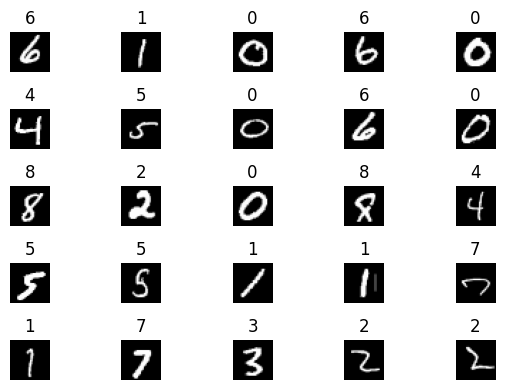

In [4]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(dpi=100)
for ix in range(25):
	ax = plt.subplot(5, 5, ix + 1)
	i = random.randint(0, len(X_train)-1)
	img, label = X_train[i], y_train[i]
	ax.imshow(img.reshape(28,28), cmap='gray')
	ax.set_title(label)
	ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
import numpy as np

X_train_3 = X_train[y_train == '3'][:200]
X_train_no_3 = X_train[y_train != '3'][:200]

len(X_train_3), len(X_train_no_3)

(200, 200)

In [7]:
def plot_samples(X):
	fig = plt.figure(dpi=100)
	for ix in range(25):
		ax = plt.subplot(5, 5, ix + 1)
		i = random.randint(0, len(X)-1)
		img = X[i]
		ax.imshow(img.reshape(28,28), cmap='gray')
		ax.axis('off')
	plt.tight_layout()
	plt.show()

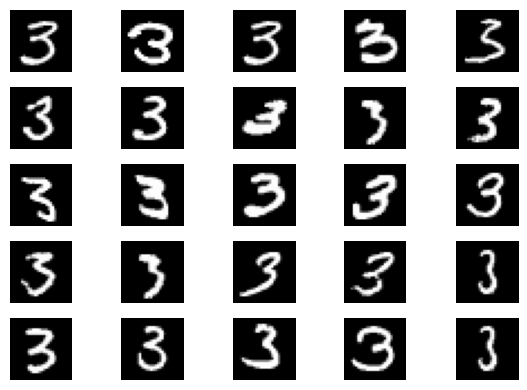

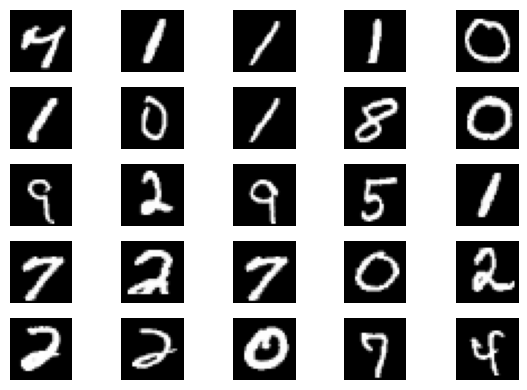

In [9]:
plot_samples(X_train_3)
plot_samples(X_train_no_3)

In [18]:
import os 
from pathlib import Path
from skimage.io import imsave
import shutil

path = Path('dataset')

def generate_dataset(X_train_3, X_train_no_3, test_size):
	shutil.rmtree(path)
	os.makedirs(path, exist_ok=True)

	splits = ['train', 'test']
	for split in splits:
		os.makedirs(path / split, exist_ok=True)
		os.makedirs(path / split / '3', exist_ok=True)
		os.makedirs(path / split / 'no3', exist_ok=True)
		if split == 'train':
			X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]
		else:
			X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]
		for x1, x2 in zip(X1, X2):
			imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', x1.reshape(28,28).astype('uint8'))
			imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', x2.reshape(28,28).astype('uint8'))


In [19]:
generate_dataset(X_train_3, X_train_no_3, 40)

In [20]:
from glob import glob

def get_paths():
	train_3 = glob(str(path / 'train' / '3' / '*.png'))
	train_no3 = glob(str(path / 'train' / 'no3' / '*.png'))
	test_3 = glob(str(path / 'test' / '3' / '*.png'))
	test_no3 = glob(str(path / 'test' / 'no3' / '*.png'))
	return train_3, train_no3, test_3, test_no3

train_3, train_no3, test_3, test_no3 = get_paths()

len(train_3), len(train_no3), len(test_3), len(test_no3)

(160, 160, 40, 40)